# Exercise Book 3

**Covering the materials of Chapters 9-10.**  
Topics: tabular data, plotting and diagram visualization

Open and read the attached `data/airports.csv` file, containing information about (larger) airports all over the world:
 1. IATA code (International Air Transport Association code, e.g. *BUD* for the Budapest Airport)
 2. ICAO code (International Civil Aviation Organization code, e.g. *LHBP* for the Budapest Airport)
 3. Name
 4. Number of runways
 5. Longest runway length (in foots)
 6. Elevation (in foots)
 7. Country
 8. Country region
 9. City
 10. Latitude
 11. Longitude

The columns in each row are delimited with `;` characters (instead of the default `,`).

In [1]:
import pandas as pd

airports = pd.read_csv('../data/airports.csv', delimiter=';')
display(airports)

,iata,icao,name,runways,longest,elevation,country,region,city,lat,lon
0,ATL,KATL,Hartsfield - Jackson Atlanta International Air...,5,12390,1026,US,US-GA,Atlanta,33.636700,-84.428101
1,ANC,PANC,Anchorage Ted Stevens,3,12400,151,US,US-AK,Anchorage,61.174400,-149.996002
2,AUS,KAUS,Austin Bergstrom International Airport,2,12250,542,US,US-TX,Austin,30.194500,-97.669899
3,BNA,KBNA,Nashville International Airport,4,11030,599,US,US-TN,Nashville,36.124500,-86.678200
4,BOS,KBOS,Boston Logan,6,10083,19,US,US-MA,Boston,42.364300,-71.005203
...,...,...,...,...,...,...,...,...,...,...,...
3459,LNL,ZLLN,Cheng Xian Airport,1,9186,3707,CN,CN-62,Longnan,33.789722,105.788611
3460,XAI,ZHXY,Xinyang Minggang Airport,1,8858,4528,CN,CN-41,Xinyang,32.540556,114.078889
3461,YYA,ZGYY,Sanhe Airport,1,8530,230,CN,CN-43,Yueyang,29.312500,113.281667
3462,BQJ,UEBB,Batagay Airport,2,6562,699,RU,RU-SA,Batagay,67.647778,134.693611


---

## Task 1

Write a program that calculates and prints for each country the number of airports in that country. Sort the list by the number of airports.

In [2]:
display(airports.groupby('country').count()['iata'].sort_values(ascending=False))

country
US    583
CN    217
CA    205
AU    130
RU    126
     ... 
GM      1
NR      1
GN      1
GP      1
KW      1
Name: iata, Length: 231, dtype: int64

## Task 2

Write a program that calculates and prints which city has the highest elevation. If a city has multiple airports, calculate the average (mean)  elevation of the airports in that city.

In [3]:
display(airports.groupby('city').mean()['elevation'].idxmax())

'Daocheng'

## Task 3

Write a program that displays the city names which has at least 5 runways accumulated. Sort the city list by the number of runways decreasing and also display the number of runway in each city.

*Note: keep in mind that a city might have multiple airports!*

In [4]:
airports_city = airports.groupby('city').sum()
display(airports_city[airports_city['runways'] >= 5].sort_values(by='runways', ascending=False)['runways'])

city
Chicago            12
Dallas             10
Houston             9
London              9
Denver              9
Hamilton            8
Orlando             8
Melbourne           8
Sydney              8
Istanbul            8
Toronto             8
Beijing             8
Paris               7
Columbus            7
Moscow              7
Victoria            7
Portland            7
Washington D.C.     7
Cincinnati          7
Phoenix             6
New York            6
Albany              6
Aberdeen            6
San Jose            6
Greenville          6
Glasgow             6
Detroit             6
Tokyo               6
Boston              6
Amsterdam           6
Tauranga            5
Springfield         5
Tehran              5
Shannon             5
Seoul               5
Santiago            5
Ufa                 5
Santa Rosa          5
Milwaukee           5
Rochester           5
Reykjavik           5
Paraparaumu         5
Nelson              5
Napier              5
Karup               5
James

## Task 4

Create a *bar plot*, displaying length of the longest runway for each airport. The aiports shall be sorted by the longest runway length (ascending). Visualize only the top 100 aiports, so the diagram will be readable. Set an appropriate figure size, so all bars and labels are readable.

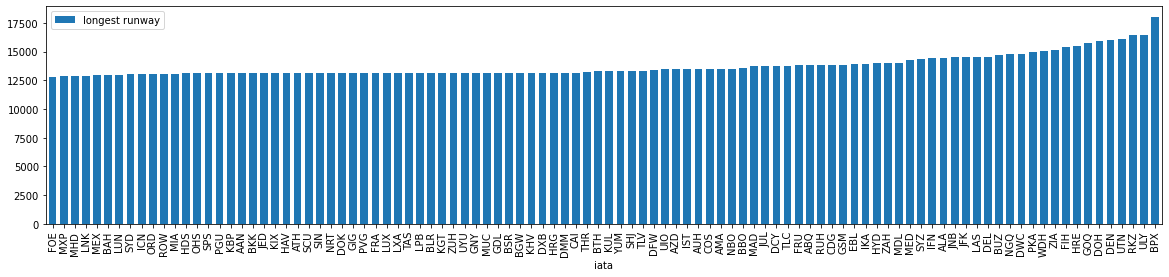

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

airports.sort_values(by='longest').tail(100).plot(kind='bar', x='iata', y='longest', figsize=[20,4], width=0.7, label='longest runway')
plt.show()

## Task 5

Create a *bar plot*, displaying length of the longest runway for each **city**. The cities shall be sorted by the longest runway length (ascending). Visualize only the top 100 cities, so the diagram will be readable. Set an appropriate figure size, so all bars and labels are readable.

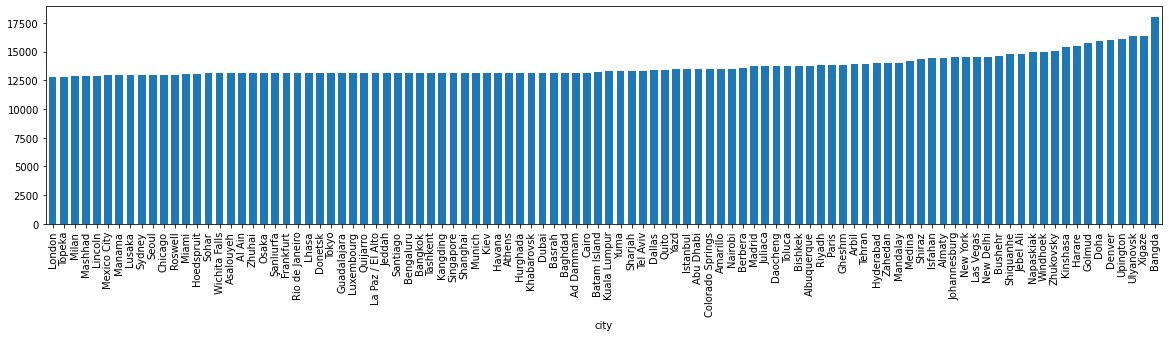

In [6]:
airports.groupby('city').max()['longest'].sort_values().tail(100).plot(kind='bar', figsize=[20,4], width=0.7, label='longest runway')
plt.show()